In [12]:
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv('train.csv')
data = data.iloc[:,[0,2,-1]]

# Split into features and target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Normalize features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


In [13]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        num_samples, num_features = X.shape
        
        # Initialize weights and bias to zeros
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        for _ in range(self.num_iterations):
            # Calculate predictions
            y_pred = self.predict(X)
            
            # Calculate gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)
            
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


In [14]:
model = LinearRegression()
model.fit(X, y)


In [22]:
# Load the test dataset
test_data = pd.read_csv('test.csv')
test_data.head()
true_y = test_data.iloc[:,-1]
test_data = test_data.iloc[:,[0,2]]

# Split into features and target variable
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

# Normalize test features
X_test = (X_test - np.mean(X, axis=0)) / np.std(X, axis=0)

# Make predictions on the test dataset
predictions = model.predict(X_test)

# Calculate the mean squared error
mse = np.mean((predictions - y_test) ** 2)

print(f"Mean Squared Error: {mse}")


Mean Squared Error: 4732325067831.32


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create and fit the model
sklearn_model = LinearRegression()
sklearn_model.fit(X, y)

# Make predictions on the test dataset
sklearn_predictions = sklearn_model.predict(X_test)

# Calculate the mean squared error
sklearn_mse = mean_squared_error(y_test, sklearn_predictions)

print(f"Scikit-learn Mean Squared Error: {sklearn_mse}")


Scikit-learn Mean Squared Error: 4732501768598.378


Gradient Descent

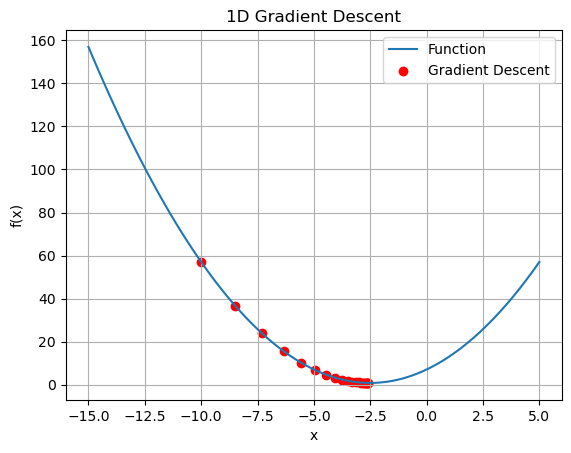

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x ** 2 + 5 * x + 7

def gradient_descent_1d(learning_rate, num_iterations):
    x = -10  # Starting point
    trajectory = [x]
    
    for _ in range(num_iterations):
        gradient = 2 * x + 5  # Gradient of the function
        x = x - learning_rate * gradient
        trajectory.append(x)
    
    return trajectory

learning_rate = 0.1
num_iterations = 20

trajectory = gradient_descent_1d(learning_rate, num_iterations)

x_vals = np.linspace(-15, 5, 100)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='Function')
plt.scatter(trajectory, [f(x) for x in trajectory], color='red', label='Gradient Descent')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('1D Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()


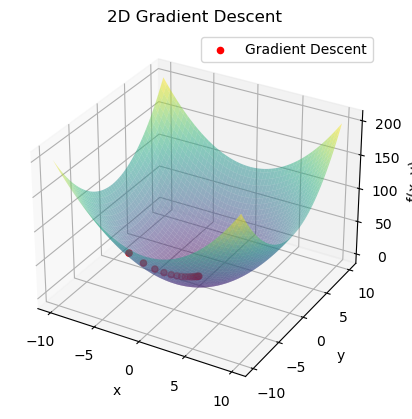

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return x ** 2 + y ** 2

def gradient_descent_2d(learning_rate, num_iterations):
    x = -5  # Starting point
    y = -5
    trajectory = [(x, y)]
    
    for _ in range(num_iterations):
        grad_x = 2 * x  # Partial derivative with respect to x
        grad_y = 2 * y  # Partial derivative with respect to y
        
        x = x - learning_rate * grad_x
        y = y - learning_rate * grad_y
        
        trajectory.append((x, y))
    
    return trajectory

learning_rate = 0.1
num_iterations = 20

trajectory = gradient_descent_2d(learning_rate, num_iterations)

x_vals = np.linspace(-10, 10, 100)
y_vals = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
ax.scatter([x[0] for x in trajectory], [x[1] for x in trajectory], [f(x[0], x[1]) for x in trajectory], color='red', label='Gradient Descent')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('2D Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()
